In [17]:
import pandas as pd
import numpy as np

In [2]:
rasff = pd.read_csv(r"F:\Final_project\RASFF_window.csv", on_bad_lines='skip')

In [107]:
rasff.head()

,reference,category,type,subject,date,notifying_country,classification,risk_decision,distribution,forAttention,forFollowUp,operator,origin,hazards
0,2025.8491,meat and meat products (other than poultry),food,Suspected Salmonella i beef and hamburgers fro...,31-10-2025 16:30:35,Sweden,information notification for follow-up,potential risk,"Denmark,Sweden",NaN,"Denmark,Netherlands","Denmark,Netherlands,Sweden",Netherlands,NaN
1,2025.8490,feed materials,feed,DNA przeżuwaczy w materiale paszowym dla świń ...,31-10-2025 16:24:06,Poland,information notification for follow-up,potential risk,NaN,"Belgium,Poland",Belgium,"Belgium,Poland",Belgium,NaN
2,2025.8488,"dietetic foods, food supplements and fortified...",food,Food supplements from USA containing prohibite...,31-10-2025 16:01:46,Ireland,information notification for attention,potential risk,Ireland,"INFOSAN,United States",United States,United States,United States,NaN
3,2025.8487,meat and meat products (other than poultry),food,Presence of Listeria monocytogenes ST 451 in d...,31-10-2025 15:55:06,Italy,alert notification,serious,"Austria,Germany,Italy,Netherlands,Slovenia",NaN,"Austria,Germany,Netherlands,Slovenia","Austria,Italy",Italy,Listeria monocytogenes
4,2025.8486,"dietetic foods, food supplements and fortified...",food,Food supplement with novel food ingredient fro...,31-10-2025 15:48:56,Austria,information notification for attention,potential risk,NaN,"Austria,Ireland,United Kingdom",United Kingdom,"Ireland,United Kingdom",United Kingdom,not in catalogue


In [59]:
rasff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27398 entries, 0 to 27397
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   reference          27398 non-null  float64
 1   category           27397 non-null  object 
 2   type               27398 non-null  object 
 3   subject            27398 non-null  object 
 4   date               27398 non-null  object 
 5   notifying_country  27398 non-null  object 
 6   classification     27398 non-null  object 
 7   risk_decision      27398 non-null  object 
 8   distribution       18759 non-null  object 
 9   forAttention       14966 non-null  object 
 10  forFollowUp        13812 non-null  object 
 11  operator           27303 non-null  object 
 12  origin             26823 non-null  object 
 13  hazards            20240 non-null  object 
dtypes: float64(1), object(13)
memory usage: 2.9+ MB


In [108]:
rasff.nunique()

reference            27398
category                37
type                     6
subject              23971
date                 27392
notifying_country       33
classification           6
risk_decision            7
distribution          4792
forAttention          2790
forFollowUp           4469
operator              4875
origin                 609
hazards               2794
dtype: int64

In [109]:
#Checking for missing values per column
rasff.isnull().sum()

reference                0
category                 1
type                     0
subject                  0
date                     0
notifying_country        0
classification           0
risk_decision            0
distribution          8639
forAttention         12432
forFollowUp          13586
operator                95
origin                 575
hazards               7158
dtype: int64

In [3]:
#drop the row with missing value in the column 'category'
rasff_clean=rasff.dropna(subset=['category'])

In [4]:
rasff_clean.isnull().sum()

reference                0
category                 0
type                     0
subject                  0
date                     0
notifying_country        0
classification           0
risk_decision            0
distribution          8638
forAttention         12432
forFollowUp          13586
operator                94
origin                 574
hazards               7157
dtype: int64

#### Checking potentially mislabelled/wrong information for each column

In [112]:
rasff_clean['category'].value_counts()

category
fruits and vegetables                                   4934
nuts, nut products and seeds                            3291
poultry meat and poultry meat products                  2309
dietetic foods, food supplements and fortified foods    1947
cereals and bakery products                             1779
herbs and spices                                        1763
fish and fish products                                  1476
meat and meat products (other than poultry)             1155
food contact materials                                  1114
feed materials                                          1072
other food product / mixed                              1068
milk and milk products                                   655
prepared dishes and snacks                               633
confectionery                                            633
bivalve molluscs and products thereof                    541
cocoa and cocoa preparations, coffee and tea             512
crustaceans and

In [113]:
rasff_clean['type'].value_counts()

type
food                                        24696
feed                                         1566
food contact material                        1106
other                                          15
animals                                        10
plants, plant products and other objects        4
Name: count, dtype: int64

In [114]:
rasff_clean['classification'].value_counts()


classification
border rejection notification             8420
alert notification                        7995
information notification for attention    6286
information notification for follow-up    4692
non-compliance notification                  3
serious                                      1
Name: count, dtype: int64

In [115]:
rasff_clean['risk_decision'].value_counts()

risk_decision
serious                14755
not serious             4134
undecided               3029
potential risk          2689
potentially serious     2372
no risk                  417
Poland                     1
Name: count, dtype: int64

In [5]:
rasff_clean[rasff['risk_decision'] == 'Poland']

C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_24404\2508065537.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rasff_clean[rasff['risk_decision'] == 'Poland']


,reference,category,type,subject,date,notifying_country,classification,risk_decision,distribution,forAttention,forFollowUp,operator,origin,hazards
21890,2021.2621,poultry meat and poultry meat products,food,Salmonella Enteritidis detected in chicken nec...,Poland,information notification for attention,serious,Poland,Hungary,NaN,"Hungary,Poland","Hungary,Poland",Salmonella Enteritidis,NaN


In [6]:
#the wrong value has been replaced
rasff_clean.loc[rasff_clean['risk_decision'] == 'Poland',
          ['date', 'notifying_country', 'classification', 'risk_decision',
           'distribution', 'forAttention', 'forFollowUp', 'operator',
           'origin', 'hazards']
] = ['25-05-2021', 'poland', 'information notification for attention', 'serious',
     'poland', 'hungary', 'NaN', 'hungary, poland', 'hungary, poland',
     'Salmonella Enteritidis']

In [7]:
rasff_clean.loc[21890]

reference                                                    2021.2621
category                        poultry meat and poultry meat products
type                                                              food
subject              Salmonella Enteritidis detected in chicken nec...
date                                                        25-05-2021
notifying_country                                               poland
classification                  information notification for attention
risk_decision                                                  serious
distribution                                                    poland
forAttention                                                   hungary
forFollowUp                                                        NaN
operator                                               hungary, poland
origin                                                 hungary, poland
hazards                                         Salmonella Enteritidis
Name: 

In [119]:
rasff_clean['risk_decision'].value_counts()

risk_decision
serious                14756
not serious             4134
undecided               3029
potential risk          2689
potentially serious     2372
no risk                  417
Name: count, dtype: int64

In [120]:
rasff_clean['classification'].value_counts()

classification
border rejection notification             8420
alert notification                        7995
information notification for attention    6287
information notification for follow-up    4692
non-compliance notification                  3
Name: count, dtype: int64

In [121]:
rasff_clean['notifying_country'].value_counts()

notifying_country
Germany                3700
Netherlands            3563
Italy                  2340
Belgium                2222
France                 2218
Spain                  1979
Poland                 1732
Bulgaria               1107
Denmark                 781
Greece                  680
Sweden                  660
Finland                 550
Latvia                  499
Austria                 473
Ireland                 459
Slovenia                435
Switzerland             420
Lithuania               412
Czech Republic          389
Croatia                 372
Romania                 364
United Kingdom          352
Portugal                297
Cyprus                  213
Slovakia                213
Norway                  199
Hungary                 198
Estonia                 171
Luxembourg              154
European Commission     129
Malta                   101
Iceland                  14
poland                    1
Name: count, dtype: int64

In [75]:
rasff_clean['hazards'].nunique()

2795

In [8]:
#date to datetime
rasff_clean['date'] = pd.to_datetime(rasff['date'], dayfirst=True, errors='coerce')

C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_24404\2878694343.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rasff_clean['date'] = pd.to_datetime(rasff['date'], dayfirst=True, errors='coerce')


In [9]:
#extract year and month from datetime
rasff_clean['year'] = rasff_clean['date'].dt.year.astype('Int64') 
rasff_clean['month'] = rasff_clean['date'].dt.month.astype('Int64') 

C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_24404\1171025391.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rasff_clean['year'] = rasff_clean['date'].dt.year.astype('Int64')
C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_24404\1171025391.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rasff_clean['month'] = rasff_clean['date'].dt.month.astype('Int64')


In [124]:
rasff_clean['year']

0        2025
1        2025
2        2025
3        2025
4        2025
         ... 
27393    2020
27394    2020
27395    2020
27396    2020
27397    2020
Name: year, Length: 27397, dtype: Int64

In [125]:
rasff_clean['month']

0        10
1        10
2        10
3        10
4        10
         ..
27393     1
27394     1
27395     1
27396     1
27397     1
Name: month, Length: 27397, dtype: Int64

In [10]:
rasff_clean.isnull().sum()

reference                0
category                 0
type                     0
subject                  0
date                     1
notifying_country        0
classification           0
risk_decision            0
distribution          8638
forAttention         12431
forFollowUp          13586
operator                94
origin                 574
hazards               7156
year                     1
month                    1
dtype: int64

In [11]:
rasff_clean[rasff_clean['date'].isna()]

,reference,category,type,subject,date,notifying_country,classification,risk_decision,distribution,forAttention,forFollowUp,operator,origin,hazards,year,month
21890,2021.2621,poultry meat and poultry meat products,food,Salmonella Enteritidis detected in chicken nec...,NaT,poland,information notification for attention,serious,poland,hungary,NaN,"hungary, poland","hungary, poland",Salmonella Enteritidis,<NA>,<NA>


In [12]:
rasff_clean.loc[rasff_clean['reference'] == 2021.2621]

,reference,category,type,subject,date,notifying_country,classification,risk_decision,distribution,forAttention,forFollowUp,operator,origin,hazards,year,month
21890,2021.2621,poultry meat and poultry meat products,food,Salmonella Enteritidis detected in chicken nec...,NaT,poland,information notification for attention,serious,poland,hungary,NaN,"hungary, poland","hungary, poland",Salmonella Enteritidis,<NA>,<NA>


In [13]:
#filling the date, year, month
rasff_clean.loc[rasff_clean['reference'] == 2021.2621,
          ['date', 'year', 'month']
] = ['25-05-2021', 2021, 5]

In [14]:
rasff_clean.isnull().sum()

reference                0
category                 0
type                     0
subject                  0
date                     0
notifying_country        0
classification           0
risk_decision            0
distribution          8638
forAttention         12431
forFollowUp          13586
operator                94
origin                 574
hazards               7156
year                     0
month                    0
dtype: int64

#### Handeling missing values as NaN

In [15]:
missing_cols = rasff_clean.columns[rasff_clean.isnull().sum() > 0]
print("Columns with missing values:", list(missing_cols))

Columns with missing values: ['distribution', 'forAttention', 'forFollowUp', 'operator', 'origin', 'hazards']


In [18]:
# Replace empty strings or whitespace with np.nan
rasff_clean[missing_cols] = rasff_clean[missing_cols].replace(r'^\s*$', np.nan, regex=True)

C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_24404\2648454370.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rasff_clean[missing_cols] = rasff_clean[missing_cols].replace(r'^\s*$', np.nan, regex=True)


In [19]:
rasff_clean.isnull().sum()

reference                0
category                 0
type                     0
subject                  0
date                     0
notifying_country        0
classification           0
risk_decision            0
distribution          8638
forAttention         12431
forFollowUp          13586
operator                94
origin                 574
hazards               7156
year                     0
month                    0
dtype: int64

In [20]:
rasff_clean['year'].value_counts()

year
2024    5361
2023    4772
2021    4693
2022    4417
2025    4299
2020    3855
Name: count, dtype: Int64

In [21]:
rasff_clean.to_csv("rasff_clean1.csv", index=False)

#### EDA 

1️⃣ Count of Notifications by Year & Month

- Shows trends over time —to detect increasing hazard trends

C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_4412\78886194.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=rasff_clean, x='year', palette='viridis')


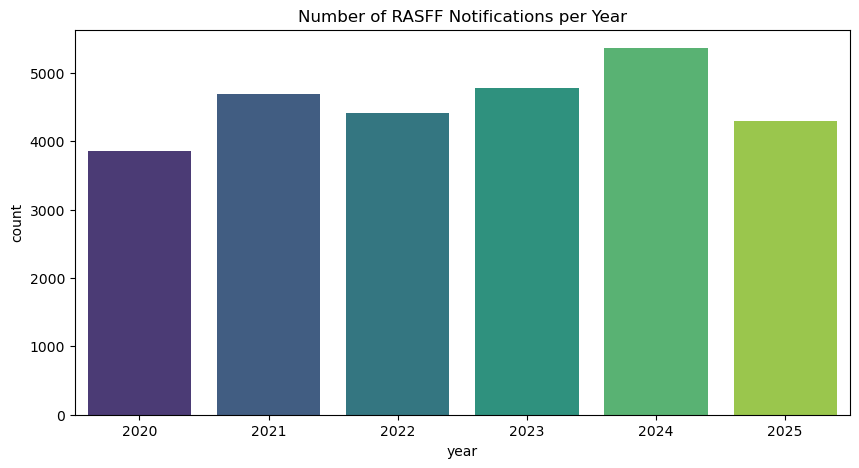

C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_4412\78886194.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=rasff_clean, x='month', palette='magma')


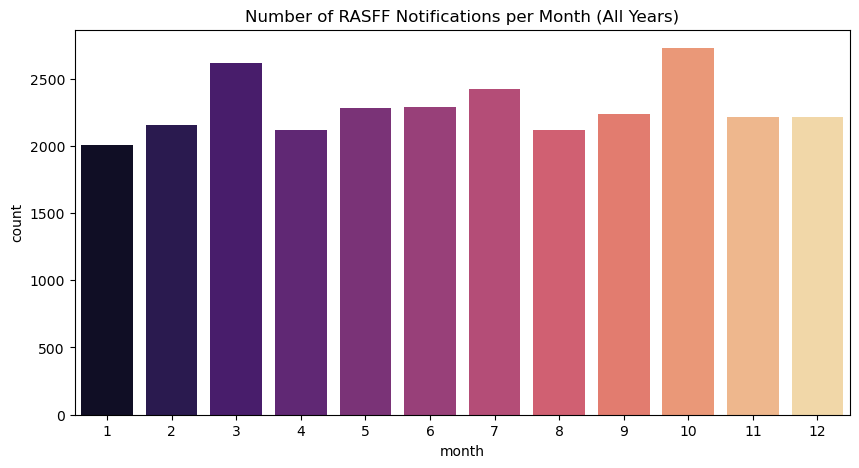

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns

# Notifications per year
plt.figure(figsize=(10,5))
sns.countplot(data=rasff_clean, x='year', palette='viridis')
plt.title("Number of RASFF Notifications per Year")
plt.show()

# Notifications per month (across all years)
plt.figure(figsize=(10,5))
sns.countplot(data=rasff_clean, x='month', palette='magma')
plt.title("Number of RASFF Notifications per Month (All Years)")
plt.show()


2️⃣ Top Categories of Food

- Identify which food categories generate the most alerts.

C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_4412\3237482691.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette='coolwarm')


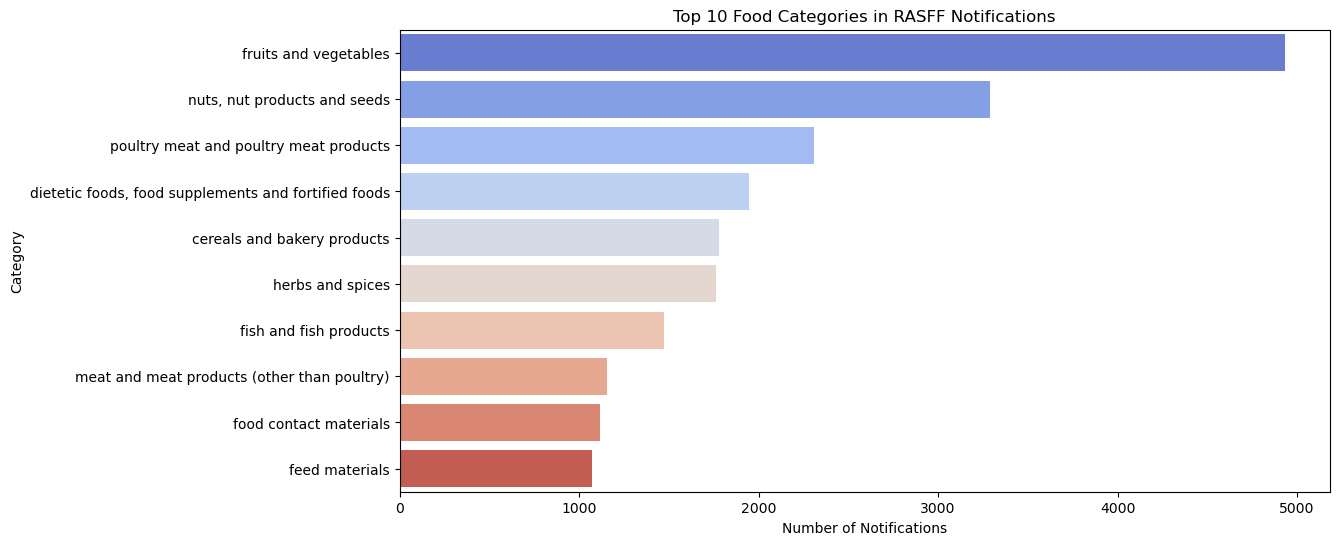

In [136]:
top_categories = rasff_clean['category'].value_counts().head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top_categories.values, y=top_categories.index, palette='coolwarm')
plt.title("Top 10 Food Categories in RASFF Notifications")
plt.xlabel("Number of Notifications")
plt.ylabel("Category")
plt.show()


3️⃣ Most Common Hazards

- hazard category is not consistent, need to be reorganized

- apply the hazard category after LLM automated hazard categorization if possible

In [145]:
rasff_clean['hazards'].value_counts()

hazards
Aflatoxin B1  ,aflatoxin total                                                                                                                 1340
ethylene oxide                                                                                                                                  884
Listeria monocytogenes                                                                                                                          736
Salmonella spp.                                                                                                                                 690
Aflatoxin B1                                                                                                                                    561
                                                                                                                                               ... 
Salmonella Morehead ,Salmonella Oranienburg                                                             

C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_4412\2916857451.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_hazards.values, y=top_hazards.index, palette='Spectral')


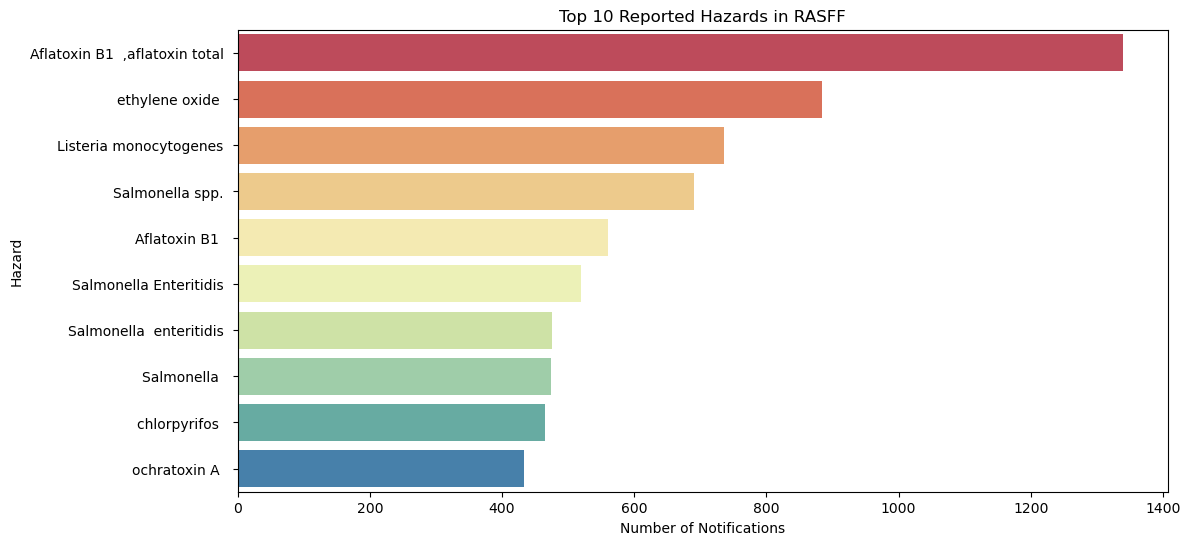

In [137]:
top_hazards = rasff_clean['hazards'].value_counts().head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top_hazards.values, y=top_hazards.index, palette='Spectral')
plt.title("Top 10 Reported Hazards in RASFF")
plt.xlabel("Number of Notifications")
plt.ylabel("Hazard")
plt.show()


4️⃣ Notifications by Country of Origin

- shows which countries contribute most to alerts (may be useful for supply chain risk analysis).

C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_4412\1937363343.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_origins.values, y=top_origins.index, palette='cubehelix')


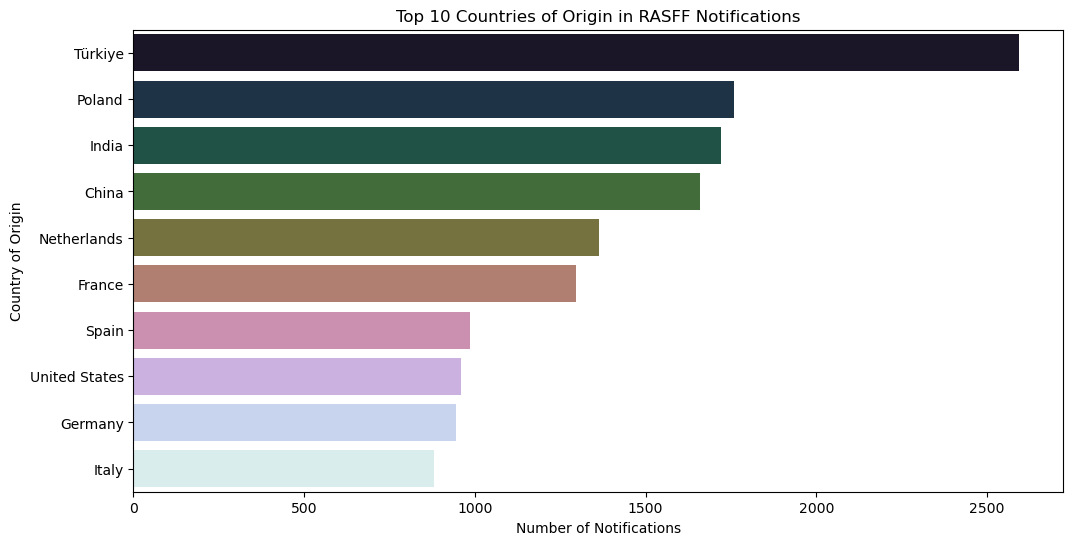

In [138]:
top_origins = rasff_clean['origin'].value_counts().head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top_origins.values, y=top_origins.index, palette='cubehelix')
plt.title("Top 10 Countries of Origin in RASFF Notifications")
plt.xlabel("Number of Notifications")
plt.ylabel("Country of Origin")
plt.show()


5️⃣ Serious vs Non-Serious Notifications

- check the distribution of risk classification.

C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_4412\787789026.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=rasff_clean, x='classification', palette='Set2')


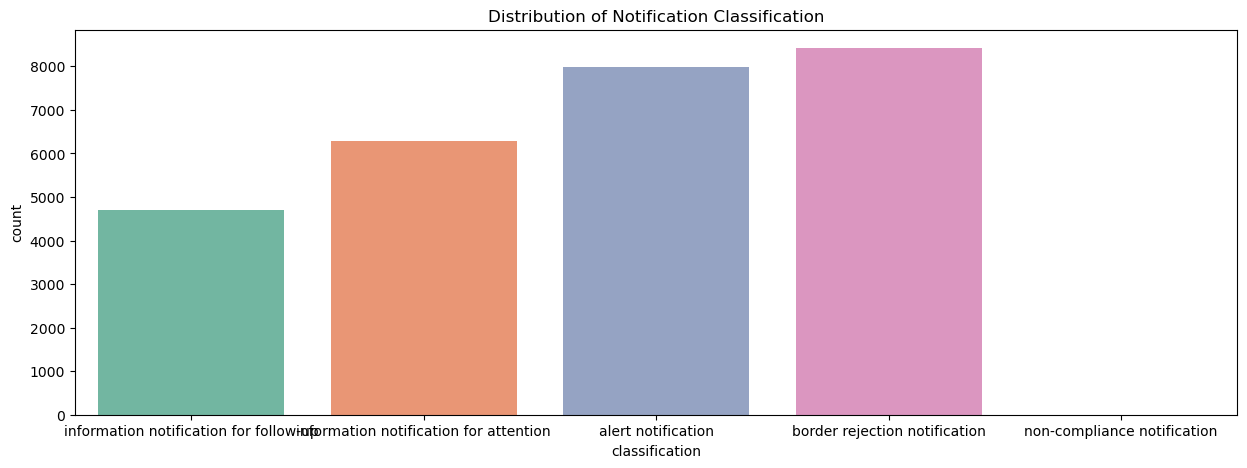

In [142]:
plt.figure(figsize=(15,5))
sns.countplot(data=rasff_clean, x='classification', palette='Set2')
plt.title("Distribution of Notification Classification")
plt.show()


6️⃣ Risk-decision

- need bivariate analysis with core value


C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_4412\3561522093.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=rasff_clean, x='risk_decision', palette='Set2')


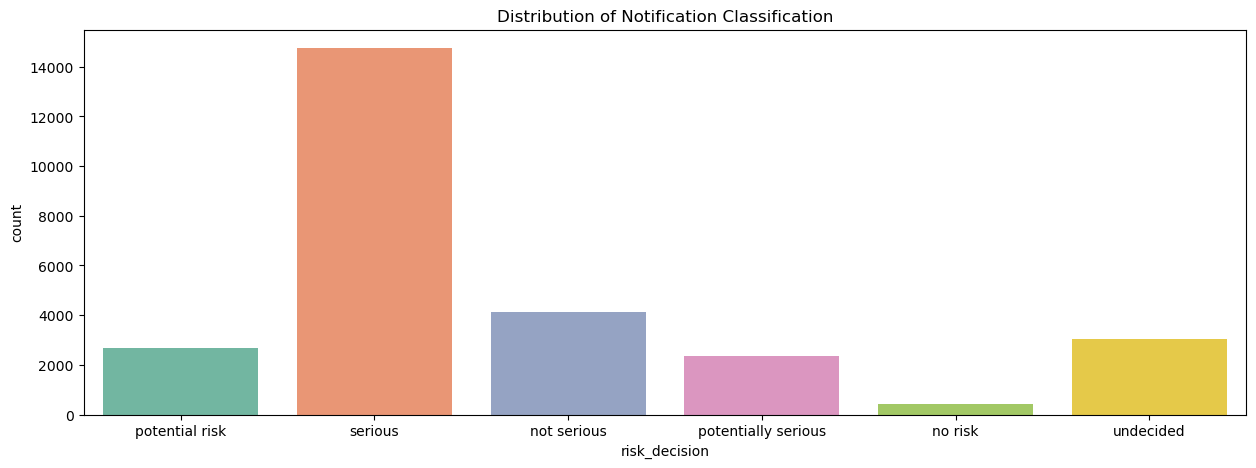

In [146]:
plt.figure(figsize=(15,5))
sns.countplot(data=rasff_clean, x='risk_decision', palette='Set2')
plt.title("Distribution of Notification Classification")
plt.show()
